In [1]:
import pylabnet.hardware.awg.zi_hdawg as zi_hdawg
from pylabnet.utils.logging.logger import LogClient

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import time

from IPython.display import clear_output, display

import pyvisa
from pylabnet.utils.logging.logger import LogClient
from pylabnet.network.client_server import agilent_e4405B
import pylabnet.hardware.spectrum_analyzer.agilent_e4405B as sa_hardware


import itertools as it
import pandas as pd
import seaborn as sns

from pylabnet.utils.logging.logger import LogService
from pylabnet.network.core.generic_server import GenericServer
import os
import sys
from pylabnet.utils.optimizer import IQOptimizer
from pylabnet.network.client_server import HMC_T2220

# Instantiante HDAWG

In [2]:
dev_id = 'dev8227'

# Instantiate
logger = LogClient(
    host='localhost',
    port=12351,
    module_tag=f'ZI HDAWG {dev_id}'
)

In [3]:
# Instantiate Hardware class
hd = zi_hdawg.Driver(dev_id, logger)

# Select channel grouping
hd.set_channel_grouping(0)

hd.enable_output(0)
hd.enable_output(1)

C:\Users\pylabnet\pylabnet\env\lib\site-packages\zhinst-20.1.1818-py3.7-win-amd64.egg\zhinst\utils.py:168: UserWarning: There is a mismatch between the versions of the API and Data Server. The API reports version `20.01' (revision: 200101818) whilst the Data Server has version `20.07' (revision 200702238). See the ``Compatibility'' Section in the LabOne Programming Manual for more information.
  warnings.warn(message)


# Connect to MW client

In [4]:
# Connect to MW source client
mw_client = HMC_T2220.Client(
    host='localhost',
    port=12378
)

In [5]:
# Check that MW source is set to correct power
# mw_client.output_on()
pow = 20  # -20 dBm
mw_client.set_power(pow)
mw_client.is_output_on()
mw_client.get_power()

20.0

# Connect to Spectrum Analyzer

In [6]:
sa = agilent_e4405B.Client(
    host='localhost',
    port=12356
)

# Reset spectrum analzyer
sa.write('*RST')

(6, <StatusCode.success: 0>)

# Optimize

Marker 'Upper Sideband' parked at 11.6200 GHz reads -12.48 dbm.
Marker 'Lower Sideband' parked at 10.7800 GHz reads -27.17 dbm.
Marker 'Carrier' parked at 11.2000 GHz reads -51.28 dbm.


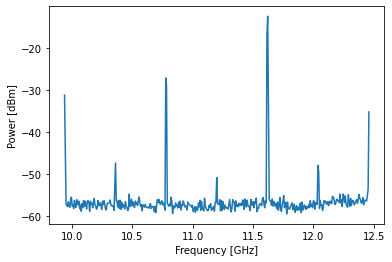

In [7]:
# See optimizer.py for a list of the keyword arguments that IQOptimizer takes
# Instantiate IQOptimizer object

opt1 = IQOptimizer(mw_client, hd, sa, 11.2e9, 420e6)

Lower sideband optimization completed in 3 iterations
Lower sideband power is -56.221 dBm


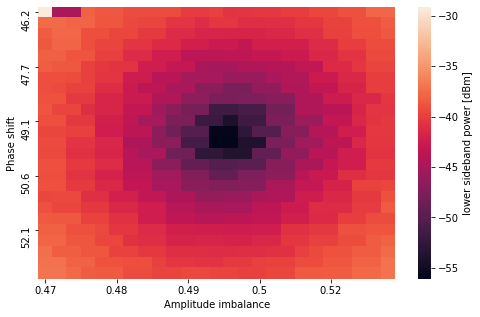

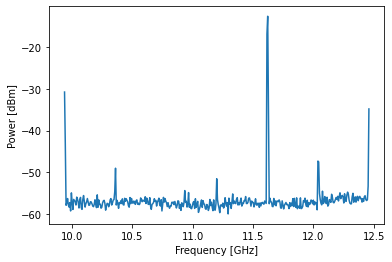

Carrier optimization completed in 1 iterations
Carrier power is -58.713


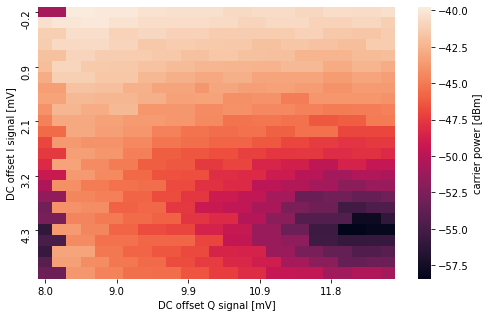

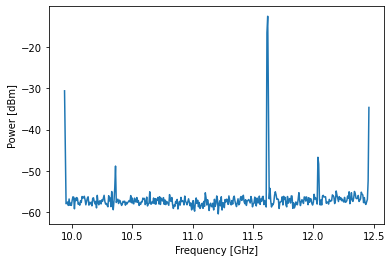

Optimized param_guess is ([49.733333333333334,0.498,0.65,0.0025000000000000005,0.0103125])
Lower sideband power is -56.539 dBm
Carrier power is -58.602 dBm


In [8]:
opt1.opt()

In [9]:
# If the optimizer fails to optimize the lower sideband or carrier frequencies,
# opt_lower_sideband() or opt_carrier() can be called, respectively:

# opt1.opt_lower_sideband()
# opt1.opt_carrier()

# print('Optimized param_guess is ([' + str(opt1.opt_phase) + ',' + str(opt1.opt_q) + ',' + str(.5*(opt1.amp_q_opt + opt1.amp_i_opt)) + ',' + str(opt1.dc_offset_i_opt) + ',' + str(opt1.dc_offset_q_opt) + '])')
# print('Lower sideband power is ' + str(opt1.lower_sb_marker.get_power()) + ' dBm')
# print('Carrier power is ' + str(opt1.carrier_marker.get_power()) + ' dBm')